# Encargo 2: k-means
María José Namuche Bustamante

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
wine = pd.read_csv("Wine.csv")
data = wine
data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [2]:
# Reemplazo de los valores de 'Customer_Segment'
wine['Customer_Segment'] = wine['Customer_Segment'].replace({1: 0, 2: 1, 3: 2})
data_frame_wine=pd.DataFrame(wine)

In [3]:
# Datos nulos
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [4]:
# Tipo de los datos en cada columna
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [5]:
data = data.drop(['Customer_Segment'], axis = 1)

In [6]:
# Separo la muestra con la que compararé luego de aplicar el algoritmo
indices = [3, 94, 156]
muestras = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()).reset_index(drop = True)

In [7]:
# Elimino de la data, los valores elegidos para la muestra
data = data.drop(indices, axis = 0)
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
# Escalo la data y muestra a utilizar
from sklearn import preprocessing
data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

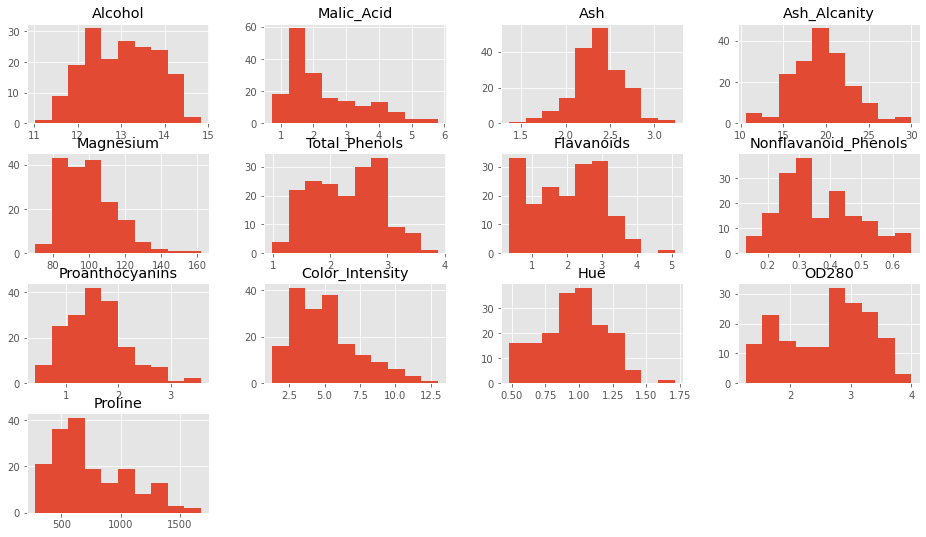

In [9]:
# Distribuciones
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
data.hist()
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [11]:
X = data_escalada.copy()

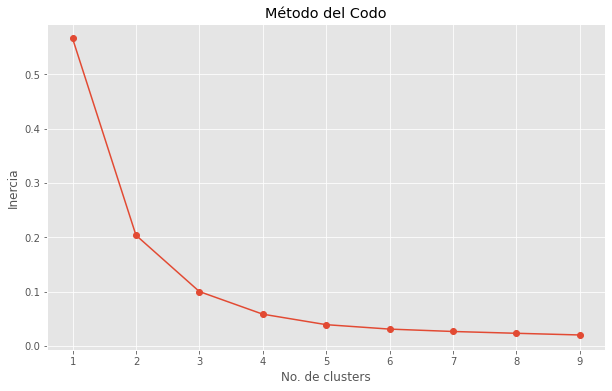

In [12]:
# Valor óptimo de K, usando el método del codo
inercia = [] 
for i in range(1, 10):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    inercia.append(algoritmo.inertia_)

plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 10)), inercia, marker='o')
plt.show()

In [13]:
## Algoritmo de clustering
# Se define el algoritmo para el valor óptimo de k = 3
algoritmo = KMeans(n_clusters = 3, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

In [14]:
algoritmo.fit(X)

KMeans(n_clusters=3)

In [15]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [16]:
muestra_prediccion = algoritmo.predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 1
Muestra 1 se encuentra en el clúster: 0
Muestra 2 se encuentra en el clúster: 2


In [17]:
plt.rcParams['figure.figsize'] = (16, 9)

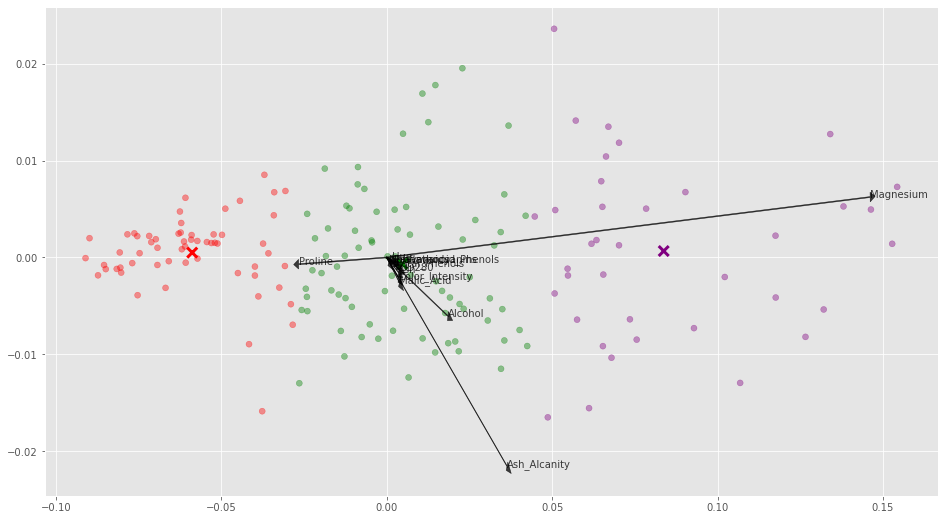

In [18]:
# Reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

# Reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Colores para cada clúster
colores = ['purple', 'red', 'green']
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

# Componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

# Centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

for i in range(len(columnas)):
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0001, head_width = 0.001, alpha = 0.75)
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()

Text(0.5, 1.0, 'K_Means')

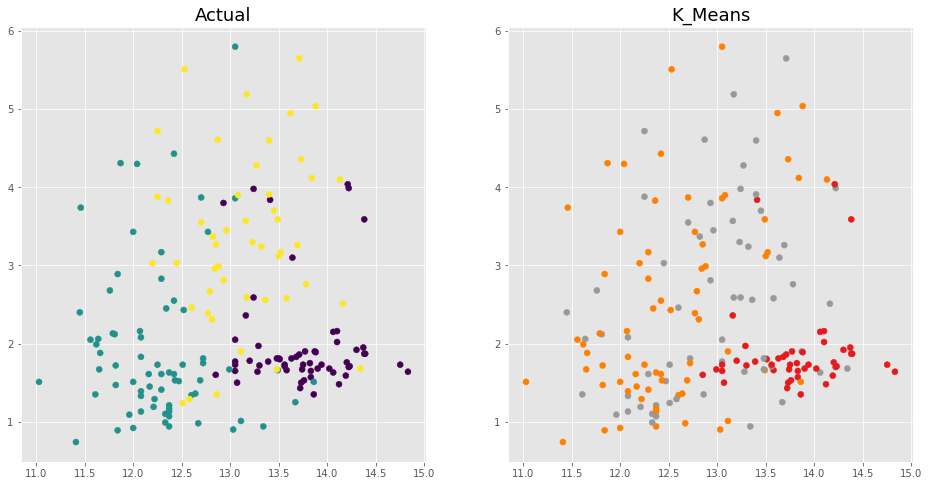

In [19]:
modelo = KMeans(n_clusters=3)
modelo.fit(data_frame_wine)
data_frame_wine['k_means']=modelo.predict(wine)
data_frame_wine['target']=wine['Customer_Segment']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(data_frame_wine['Alcohol'], data_frame_wine['Malic_Acid'], c=data_frame_wine['target'])
axes[1].scatter(data_frame_wine['Alcohol'], data_frame_wine['Malic_Acid'], c=data_frame_wine['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

Text(0.5, 1.0, 'K_Means')

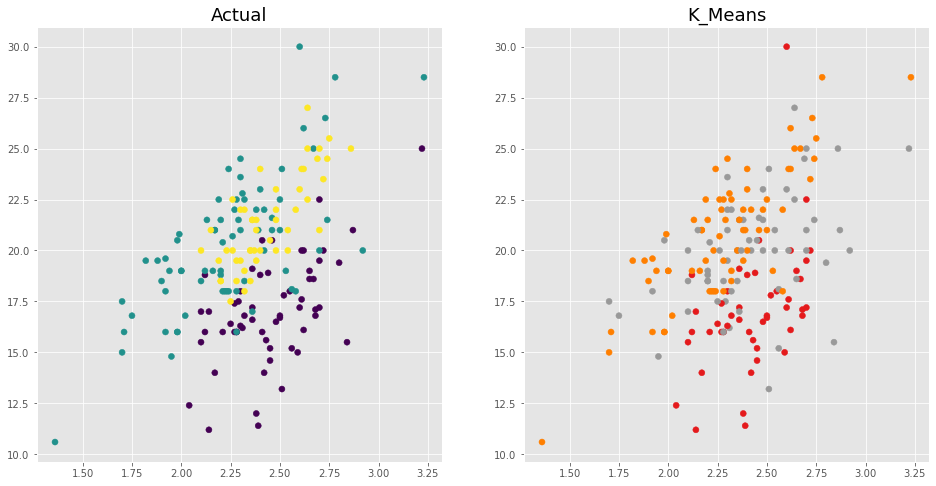

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(data_frame_wine['Ash'], data_frame_wine['Ash_Alcanity'], c=data_frame_wine['target'])
axes[1].scatter(data_frame_wine['Ash'], data_frame_wine['Ash_Alcanity'], c=data_frame_wine['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

Text(0.5, 1.0, 'K_Means')

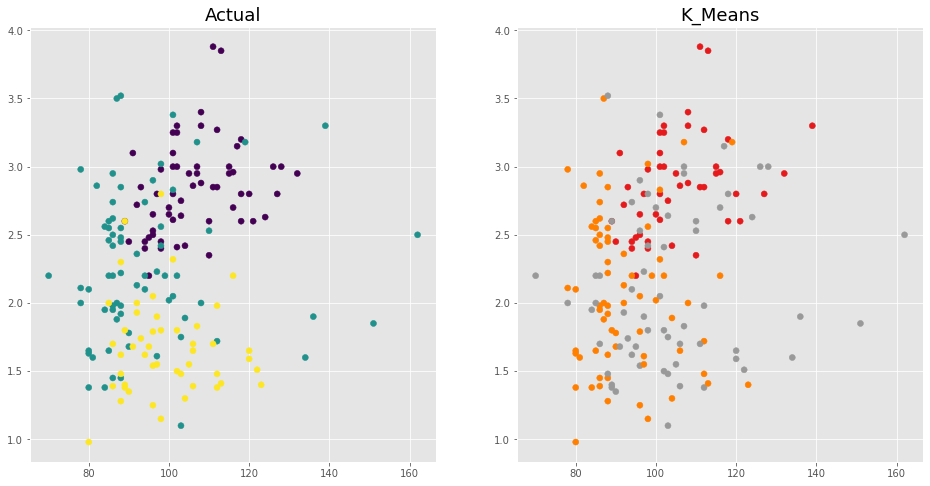

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(data_frame_wine['Magnesium'], data_frame_wine['Total_Phenols'], c=data_frame_wine['target'])
axes[1].scatter(data_frame_wine['Magnesium'], data_frame_wine['Total_Phenols'], c=data_frame_wine['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [22]:
centroids = modelo.cluster_centers_
print(centroids)

[[1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03 2.12765957e-02]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02 1.27536232e+00]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02 1.25806452e+00]]


In [23]:
data_frame_wine.groupby('target').size()

target
0    59
1    71
2    48
dtype: int64

In [24]:
data_frame_wine.groupby('k_means').size()

k_means
0    47
1    69
2    62
dtype: int64

In [25]:
# Representante del grupo
from sklearn.metrics import pairwise_distances_argmin_min
X = data_frame_wine.drop(columns = ["k_means", "target"])
closest, _ = pairwise_distances_argmin_min(modelo.cluster_centers_, X)
closest

array([ 52,  79, 155], dtype=int64)

In [26]:
data_frame_wine[52:53]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,k_means,target
52,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190,0,0,0


In [27]:
data_frame_wine[79:80]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,k_means,target
79,12.7,3.87,2.4,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463,1,1,1


In [28]:
data_frame_wine[155:156]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,k_means,target
155,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.9,0.6,1.48,725,2,2,2


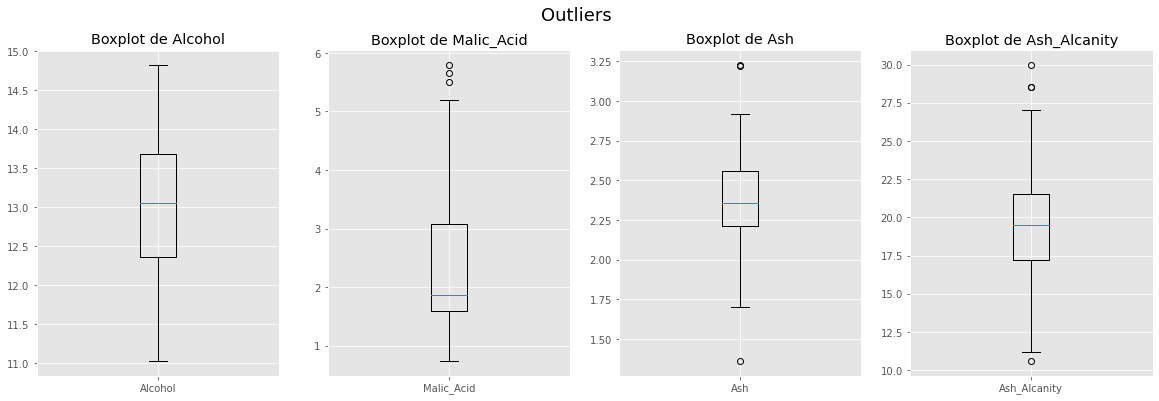

In [29]:
i = 0
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Outliers', fontsize=18)
for col in ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity']:
    ax[i].set_title('Boxplot de ' + col)
    ax[i].boxplot(data_frame_wine[col], labels=[col])  
    i=i+1
plt.show()

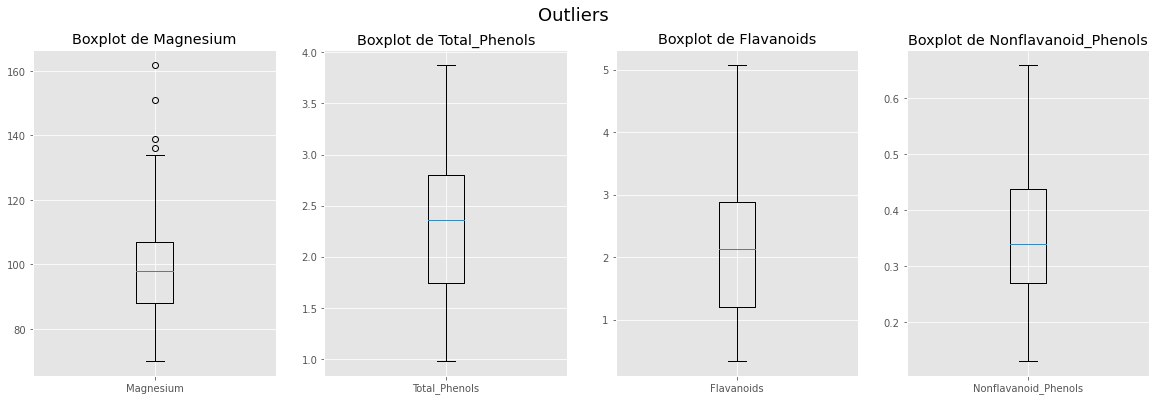

In [30]:
i = 0
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Outliers', fontsize=18)
for col in ['Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols']:
    ax[i].set_title('Boxplot de ' + col)
    ax[i].boxplot(data_frame_wine[col], labels=[col])  
    i=i+1
plt.show()

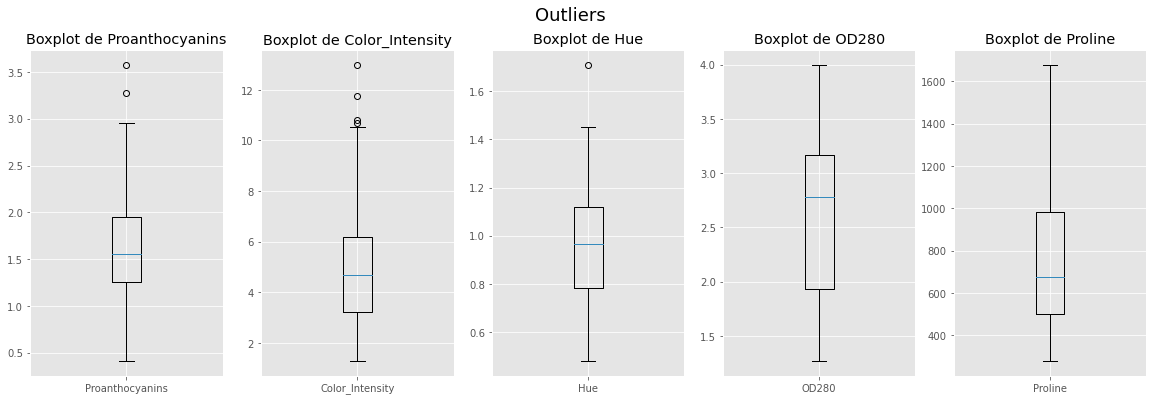

In [31]:
i = 0
fig, ax = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle('Outliers', fontsize=18)
for col in [ 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']:
    ax[i].set_title('Boxplot de ' + col)
    ax[i].boxplot(data_frame_wine[col], labels=[col])  
    i=i+1
plt.show()

In [32]:
data_frame_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,k_means,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202,1.084270,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035,0.780178,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000,0.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000,0.000000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000,1.000000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000,2.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000,2.000000,2.000000


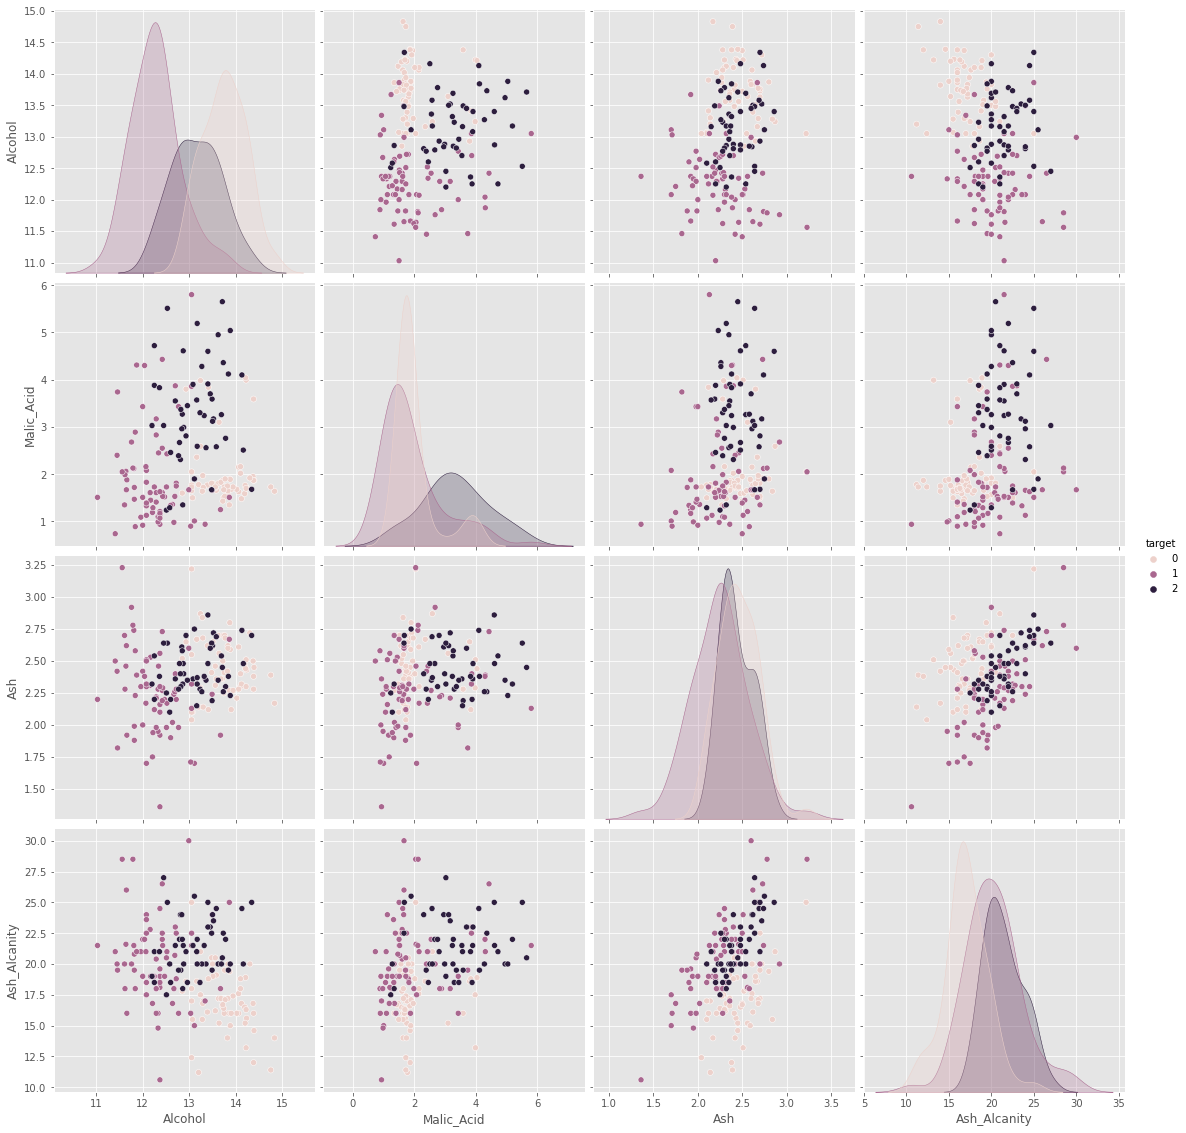

In [33]:
import seaborn as sb
sb.pairplot(data_frame_wine.dropna(), hue='target',height=4,vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity'],kind='scatter')

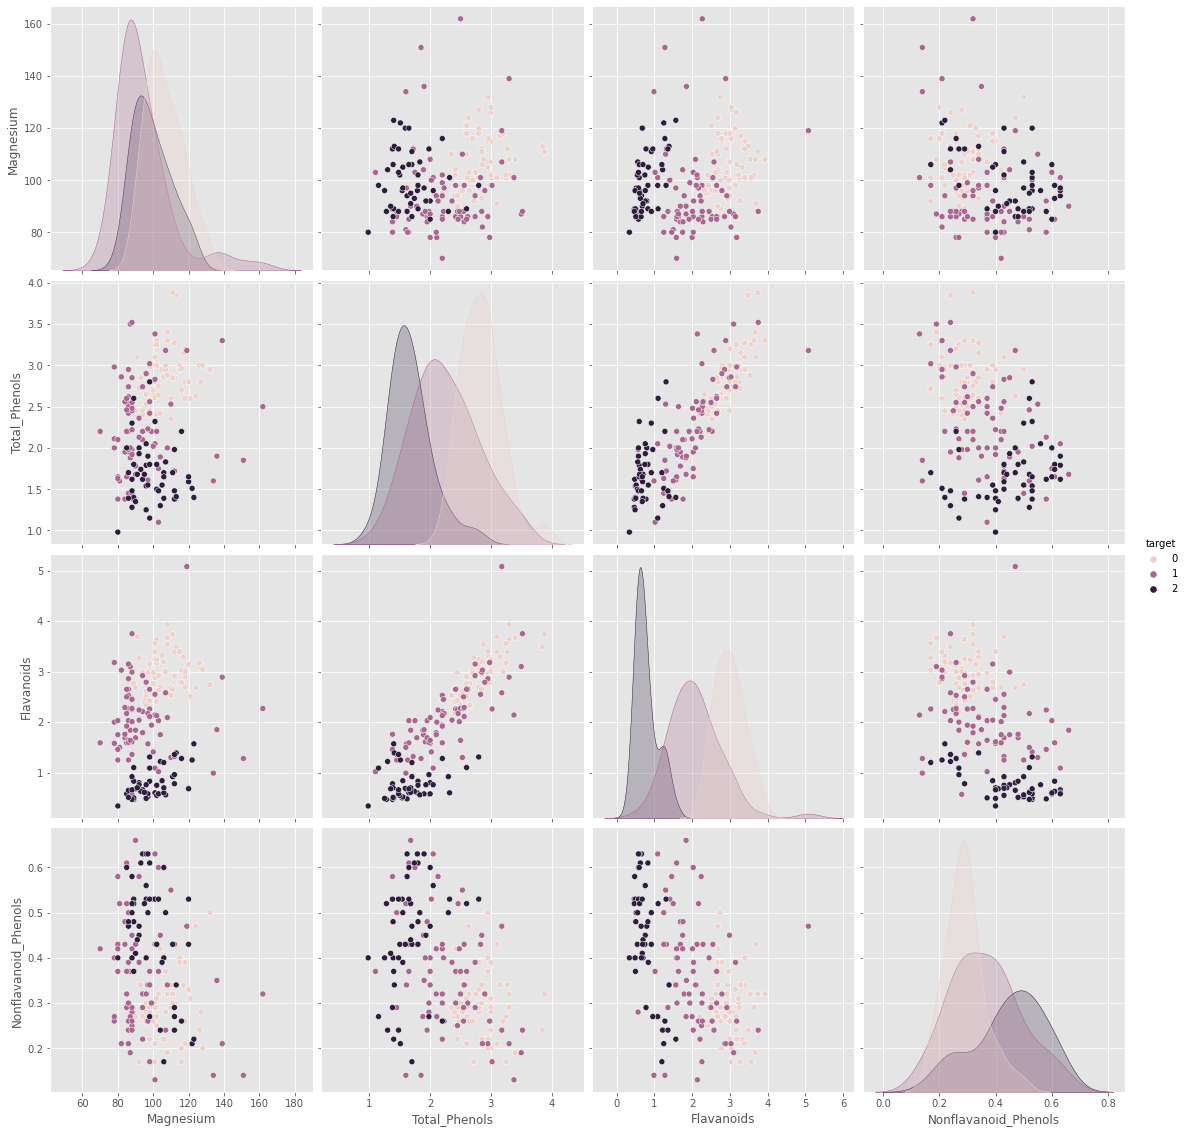

In [34]:
sb.pairplot(data_frame_wine.dropna(), hue='target',height=4,vars=['Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols'],kind='scatter')

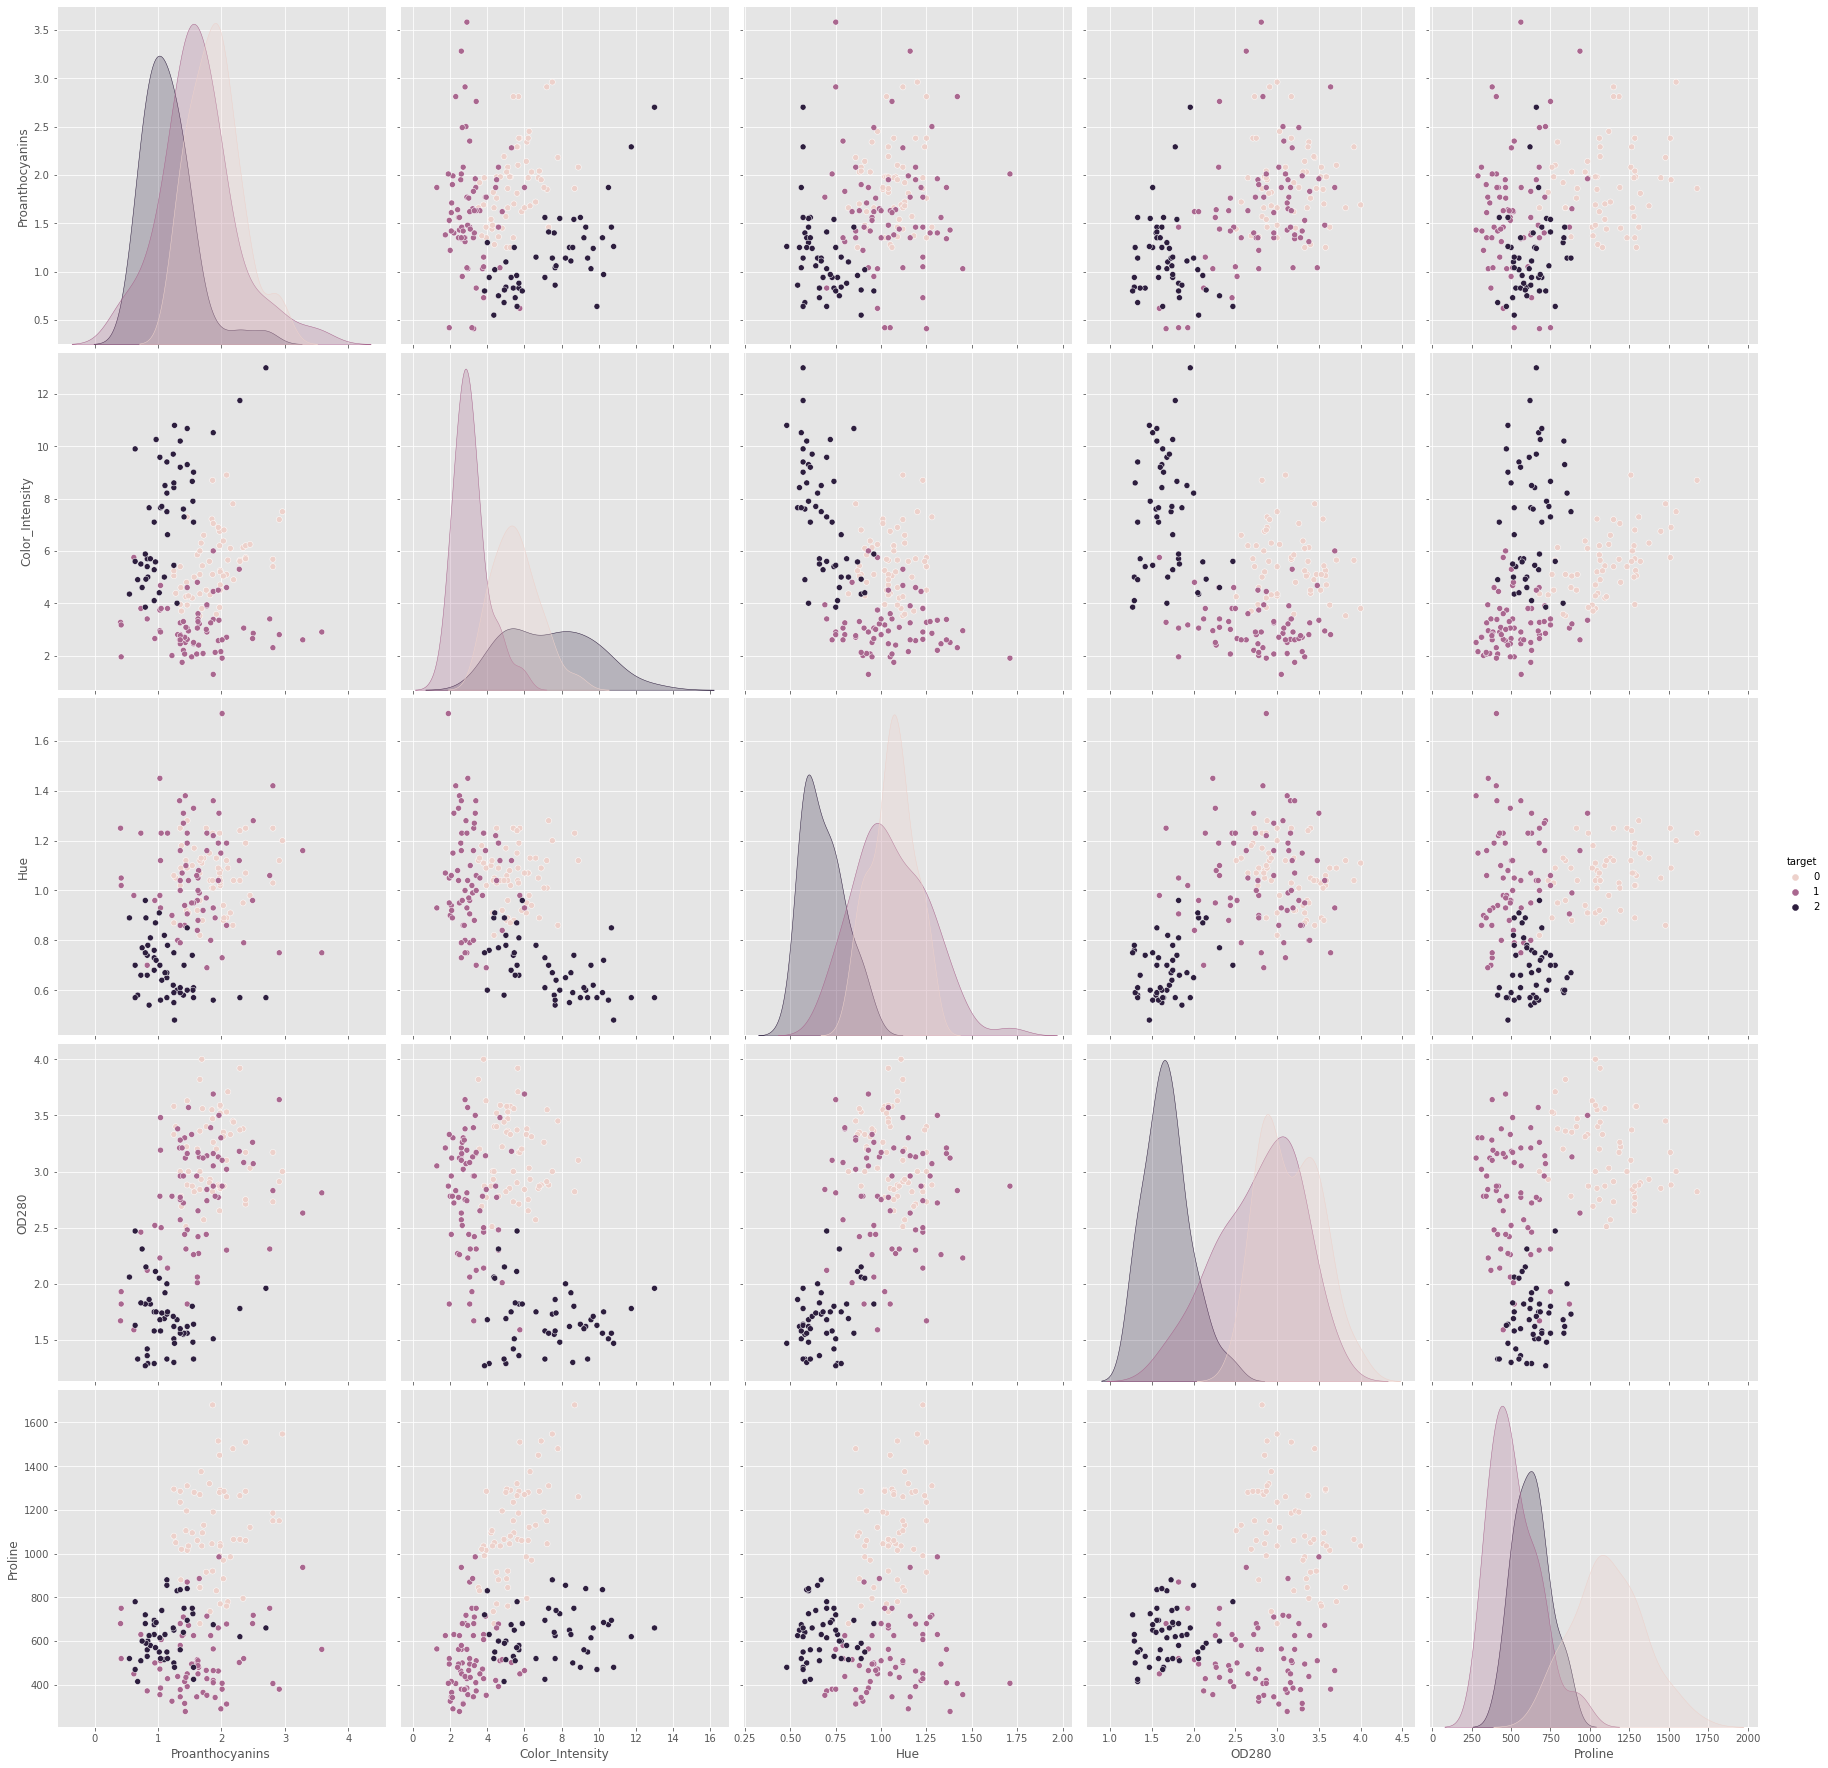

In [35]:
sb.pairplot(data_frame_wine.dropna(), hue='target',height=5,vars=['Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],kind='scatter')

Podemos observar en las gráficas que no se obtienen valores con el algoritmo de k-means que coincidan con los de 'Customer_Segment' debido a que la distancia interclúster es muy pequeña y se confunden entre sí.